In [1]:
import srsly

In [5]:
letters = srsly.read_json('data')

ValueError: Can't read file: data

In [2]:
letters = srsly.read_json('VABert/data/AnnotatedVA.json')

In [3]:
letters[2]

{'id': 998,
 'annotations': [{'id': 1042,
   'completed_by': 1,
   'result': [{'value': {'start': 224,
      'end': 229,
      'text': 'right',
      'labels': ['Laterality']},
     'id': '8MBNdD06A0',
     'from_name': 'label',
     'to_name': 'text',
     'type': 'labels',
     'origin': 'manual'},
    {'value': {'start': 238,
      'end': 243,
      'text': 'left',
      'labels': ['Laterality']},
     'id': 'IlyqShzExE',
     'from_name': 'label',
     'to_name': 'text',
     'type': 'labels',
     'origin': 'manual'},
    {'value': {'start': 234, 'end': 237, 'text': '6/6', 'labels': ['VA']},
     'id': 'ElF0Xphd0f',
     'from_name': 'label',
     'to_name': 'text',
     'type': 'labels',
     'origin': 'manual'},
    {'value': {'start': 219, 'end': 223, 'text': '6/24', 'labels': ['VA']},
     'id': '6j-IQz7KPM',
     'from_name': 'label',
     'to_name': 'text',
     'type': 'labels',
     'origin': 'manual'}],
   'was_cancelled': False,
   'ground_truth': False,
   'created_at':

In [4]:
lettersdata = list([letter['data']['text'].replace('\r','').replace('\n',' '), list(x['value']['text'] for x in letter['annotations'][0]['result']) ] for letter in letters)

In [5]:
lettersdata[24]

['This 80 year old woman was reviewed in the Cataract Service today following Left Phakoemulsification and IOL.  Principal diagnosis: Bilateral Pseudophakia Secondary diagnosis: Bilateral Conjunctival concretion   She has noted an improvement in vision following surgery.  Visual acuity: Right Eye: 6/12 Unaided, 6/9 Pinhole Left Eye: 6/60 Unaided, 6/18 Pinhole   She has been prescribed: Dexamethasone 0.1% eye drops, 1 drop(s) qid Eye (Left) for 7 days    then 1 drop(s) tid for 7 days    then 1 drop(s) bd for 7 days    then 1 drop(s) od for 7 days Ketorolac 0.5% eye drops, 1 drop(s) qid Eye (Left) for 3 weeks.  We have advised her to consult her optician for new spectacles.  We have not arranged to review her routinely, but would be happy to see her again if any further problems arose. Please fefer to our adnexal team for her  Conjunctival concretions',
 ['6/12', '6/60', 'Right', 'Left', '6/9', '6/18', 'Unaided', 'Unaided']]

In [6]:
len(lettersdata)

1000

In [7]:
agelist = []
see = ['HM', 'CF', 'LP', 'NLP']

for data in lettersdata:
    V = []
    letter = data[0]
    VA = data[1]
    if 'year old' in letter:
        idx = letter.index('year old')
        age = letter[idx-3: idx-1]
    for value in VA:
        if value[0].isnumeric() or value in see:
            V.append(value)
    if len(V)>0:        
        try:
            agelist.append([int(age),V])
            if int(age)<20:
                print(data)
        except:
            pass
        # lis.append(letter)
len(agelist)

["Thank you very much for referring this 17 year old woman whom I saw in the clinic today.   History: 2/12 history of itchy eyes L+R history of asthma, eczema and hayfever now painful eyes Visual acuity: Right Eye: 6/12 Unaided, 6/9 Pinhole Left Eye: 6/12 Unaided, 6/6 Pinhole Anterior segment: right: Florid PEE's Cobblestone papillae left: Florid PEE's Cobblestone papillae Principal diagnosis: Bilateral Seasonal allergic conjunctivitis   She has been prescribed Fluorometholone 0.1% eye drops, 1 drop(s) tid Eye (Both) for 7 days    then 1 drop(s) bd for 7 days Olopatadine 1mg in 1ml eye drops, 1 drop(s) bd Eye (Both) for 6 weeks Sodium hyaluronate 0.1% eye drops (No Preservative), 1 drop(s) qid Eye (Both) for 6 weeks.   we will review her in 3/52", ['6/12', '6/12', 'Right', 'Left', '6/9', '6/6', 'Unaided', 'Unaided']]
['This 11 year old boy attended the clinic for a follow up visit. The stromal infiltrate continues to consolidate, there is no surrounding stromal infiltrate. There is als

641

In [8]:
agelist[0]

[84, ['6/24', '6/12', '6/9', '6/18']]

In [9]:
x, y = [], []
for i in agelist:
    for j in i[1]:
        x.append([i[0],j])

In [10]:
main =[]
for i in x:
    if i in main:
        pass
    else:
        main.append(i)
len(main)

551

In [11]:
x, y = [], []
for i in main:
    x.append(i[0])
    y.append(i[1])

In [12]:
for i in main:
    if i[0]<20:
        print(i)

[17, '6/12']
[17, '6/9']
[17, '6/6']
[11, '0.4 logMAR']
[9, '0.00 logMAR']
[14, '0.00logMAR']
[2, 'HM']
[2, '6/5']
[2, '6/12']
[2, '6/9']
[14, '0.22']
[14, '0.08']
[14, '0.00']
[4, '6/24']
[4, '6/7.6']
[6, '6/7.5']
[18, '6/6']
[18, '6/5']
[18, '3/60']
[18, '6/1']
[6, '6/60']
[6, '6/12']


In [13]:
len(x), len(y)

(551, 551)

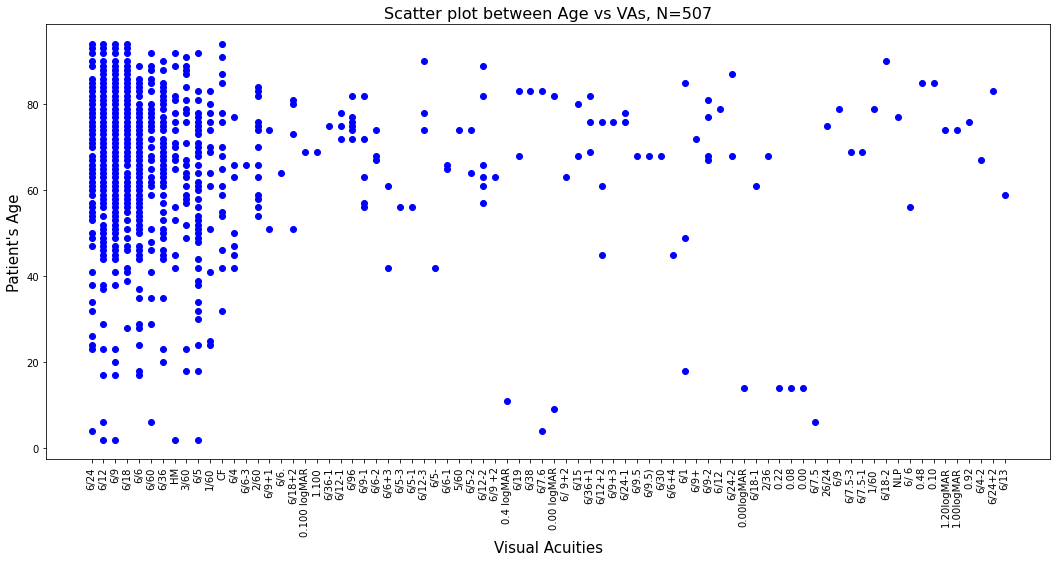

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 8))  
plt.scatter(y, x, c ="blue")
plt.xticks(rotation=90)
# To show the plot
plt.title("Scatter plot between Age vs VAs, N=507", size = 16)
plt.xlabel("Visual Acuities", size = 15)
plt.ylabel("Patient's Age", size = 15)
plt.show()

In [47]:
check = ['6/12',
 '6/18',
 '6/6',
 '6/24',
 '6/9',
 '3/60',
 '2/60',
 '6/36',
 '6/5',
 'CF',
 'HM',
 '1/60',
 '6/60']
main1 = []

for i in main:
    val = None
    if i[1] in check:
        if i[1] == '6/24':
            val = 0.602
        elif i[1] == '6/12':
            val = 0.301
        elif i[1] == '6/9':
            val = 0.176
        elif i[1] == '6/18':
            val = 0.477
        elif i[1] == '6/6':
            val = 0.000
        elif i[1] == '6/60':
            val = 1.000
        elif i[1] == '6/36':
            val = 0.778
        elif i[1] == 'HM':
            val = 0.005
        elif i[1] == '3/60':
            val = 1.301
        elif i[1] == '6/5':
            val = -0.078
        elif i[1] == '1/60':
            val = 1.778
        elif i[1] == 'CF':
            val = 0.013
        elif i[1] == '2/60':
            val = 1.477
        else:
            break
        main1.append([i[0],val])
len(main1)


438

In [49]:
x, y = [], []
for i in main1:
    x.append(i[0])
    y.append(i[1])

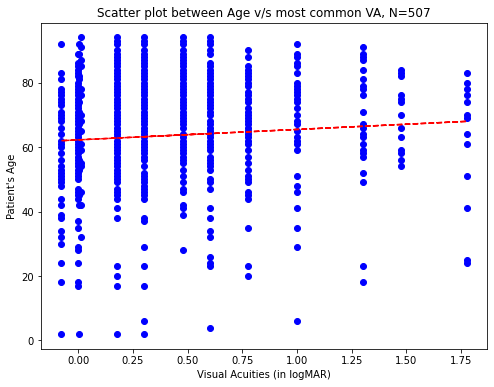

In [53]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize = (8, 6))  
plt.scatter(y, x, c ="blue")
# plt.xticks(rotation=90)
# To show the plot
z = np.polyfit(y, x, 1)
p = np.poly1d(z)
plt.plot(y, p(y), 'r--')
plt.title("Scatter plot between Age v/s most common VA, N=507")
plt.xlabel("Visual Acuities (in logMAR)")
plt.ylabel("Patient's Age")
plt.show()

In [65]:
# 6/24 = 0.602
# 6/12 = 0.301
# 0.176
# 0.477
# 0.00
# 1
# 0.778
# 0.005
# 1.301
# -0.079
# 1.778
# 0.013
# 1.477

In [12]:
sum(lis)/len(lis)

66.51451451451452

In [84]:
right = []
left = []
for letter in lettersdata:
    va = []
    lat = []
    data = letter[1]
    if data:
        for val in data:
            if val[0] == 'l' or val[0] == 'L':
                lat.append(val)
            if val[0] == 'r' or val[0] == 'R':
                lat.append(val)
            if val[0].isnumeric():
                va.append(val)
        if lat:
            size = len(va)//len(lat)
            print(size, len(lat))
            if lat[0][0] == 'l' or lat[0][0] == 'L':
                left.append(va[:size])
                right.append(va[:size])
            else:
                right.append(va[:size])
                left.append(va[size:])
#         print(right, left)

2 2
1 2
1 2
1 2
3 2
1 2
2 2
2 2
2 2
1 2
1 2
2 2
1 3
0 2
2 2
1 2
2 2
1 2
2 2
1 2
1 2
2 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
0 2
3 2
2 2
2 1
0 2
0 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
2 2
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
2 2
0 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
0 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
0 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
2 2
1 2
1 2
1 2
2 2
2 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
0 2
0 2
1 1
1 2
1 2
1 2
1 2
1 2
3 2
1 2
1 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
2 2
2 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 2
2 2
1 2
1 2
1 2
2 2
1 2
1 2
3 1
1 2
1 2
1 2


In [95]:
l = []
r = []
check = ['6/12',
 '6/18',
 '6/6',
 '6/24',
 '6/9',
 '3/60',
 '2/60',
 '6/36',
 '6/5',
 'CF',
 'HM',
 '1/60',
 '6/60']
for i in right:
    for j in i:
        if j in check:
            r.append(j)
for i in left:
    for j in i:
        if j in check:
            l.append(j)

In [123]:
len(l), len(r)

(662, 601)

In [109]:
from collections import Counter

ll = Counter(l)
rr = Counter(r)

In [110]:
yl, yr = [],[]
for c in check:
    print(c)
    yl.append(ll[c])
    yr.append(rr[c])

6/12
6/18
6/6
6/24
6/9
3/60
2/60
6/36
6/5
CF
HM
1/60
6/60


In [114]:
yl

[136, 96, 81, 47, 185, 12, 12, 35, 36, 0, 0, 8, 14]

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

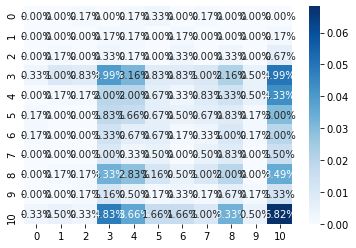

In [122]:
cf_matrix = confusion_matrix(r, l[:601])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

            A         B         C         D
aaa  1.294860  0.334338  1.003676  2.175170
bbb  0.550842  1.516083  0.871894  1.197334
ccc  1.949317  0.175471  0.087150  1.295077
ddd  0.774364  0.648375  0.941747  0.406546
eee  2.073917  1.700095  0.413026  0.253072


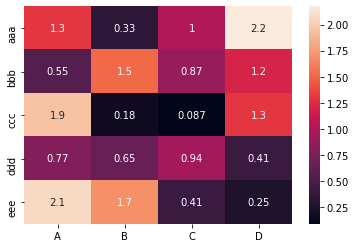

In [118]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)
print(df)
sns.heatmap(df, annot=True)

In [6]:
import re
from sklearn.metrics import f1_score

In [33]:
def checkResult(va, val):
    count = 0
    print(va,val)
    for value in va:
        if ' eye' in value:
            value = value.replace(' eye', "")
        if ' Eye' in value:
            value = value.replace(' Eye', "")
        if value in val:
            count+=1
    f1_score(va, val, average='macro')
    if len(val)==0:
        return (count/1)
    return count/(len(val))
    
def checkMyVA(letter, val):
    va = []
    regex = r"(((R|r|Right|right|RVA)|(RE|Right|Right Eye|right eye))(?=\:?\s{0,3}\d/\d))|(((L|l|Left|left|LVA|LE)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d))|(((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|HM|CF|LP|NLP))|((ph|Ph|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d))"

    matches = re.finditer(regex, letter, re.MULTILINE)

    for matchNum, match in enumerate(matches, start=1):
        va.append(match.group())
        print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    newva = []
    for i in va:
        if i in val:
            newva.append(i)
    while len(newva) != val:
        newva.append('0')
    return checkResult(newva, val)
        

In [34]:
lettersdata[1][1]

['6/24', '6/12', 'Right', 'Left', '6/9', '6/18']

In [ ]:
acc = 0
su = 0
for letter in lettersdata:
    if len(letter[1]) == 0:
        pass
    result = checkMyVA(letter[0], letter[1])
    if result !=0:
        su +=1
        acc += result
print(acc/su)

In [12]:
acc

392.5243867243868

In [57]:
lettersnew = list(letter['data']['text'].replace('\r','').replace('\n',' ') for letter in letters)

In [58]:
lettersnew[0]

'I would be very grateful if you would take over the management of this 73 year old woman.    - Diagnosis: Right cystoid macular oedema  - Operation: Right Phakoemulsification and IOL  - Prescription: g nevenac QDS right eye till review , to be prescribed by her GP  she has an unevntful right phaco +IOl in november 2015 and developped post operative CME. she did not respond to previous course of g acular as confirmed by OCT scan macula compared to previous visit 8 weeks ago. for your kind care and advise and for further management and follow up.'

In [7]:
textfile = open("VAnotes.txt", "w", encoding = "utf-8")
for letter in lettersnew:
    textfile.write(letter + "\n")
textfile.close()


In [8]:
lettersnew[10:20]

['Further to a request to list for surgery, we have been unable to successfully contact the patient despite waiting for more than 3 weeks for a reply to an invitation letter and telephone messages.  The patient is therefore discharged back to your care.',
 'This lady has significant cataract in her left eye . VA 6/6RE,6/18LE. She has been placed on waiting list for surgery.',
 'Thank you for referring this gentleman with cataracts. I have discussed the risks and benefits of cataract surgery and he would like to proceed with left phacoemulsification and intraocular lens insertion under local anaesthesia followed by right phacoemulsification and intraocular lens insertion local anaesthesia. We will arrange for this in the near future.',
 'This 65 year old woman was discharged from hospital today.   - Diagnosis: Left cataract  - Operation: Left Phakoemulsification and IOL  - Prescription: Chloramphenicol 0.5% eye drops, 1 drop(s) qid Eye (Left) for 7 days Dexamethasone 0.1% eye drops, 1 d

In [4]:
import re

def useRegex(letter):
    pattern = re.compile(r"(\s|^|~|:)(6|20)\/\s*(\d+)\s*([+|-])*\s*(\d)*|(HM|CF|LP|NLP)")
    print(pattern.match(letter))

In [5]:
pattern = re.compile(r"/(\s|^|~|:)(6|20)\/\s*(\d+)\s*([+|-])*\s*(\d)*|(HM|CF|LP|NLP)/")

In [6]:
txt = "visual acuity was 6/12+2 right and Refraction 6/9 left"
x = re.search("/(\s|^|~|:)(6|20)\/\s*(\d+)\s*([+|-])*\s*(\d)*|(HM|CF|LP|NLP)/", txt)
print(x)

None


In [7]:
useRegex('visual acuity was 6/12+2 right and Refraction 6/9 left')

None


Total = 314,000,
Containing VA = 82.6% = *259,364 clinical letters of MEH*

In [8]:
import nltk
from nltk.tokenize import word_tokenize

In [9]:
text= letters[0]
tokenized_word=word_tokenize(text)
tokenized_word

['Diagnosis',
 ':',
 'Bilateral',
 'RD',
 'Repairs',
 'Bilteral',
 'Pseudophakia',
 'Left',
 'Vitrectomy/Peel',
 'for',
 'Epiretinal',
 'Membrane',
 '(',
 'ERM',
 ')',
 'Right',
 'ERM',
 'Unaided',
 'Vision',
 ':',
 'RE',
 '6/60',
 'LE',
 '6/24',
 'Outcome',
 ':',
 'Listed',
 'for',
 'Right',
 'Vitrectomy/ERM',
 'Peel',
 'This',
 'pleasant',
 'lady',
 'attended',
 'clinic',
 'today',
 'reporting',
 'being',
 'troubled',
 'by',
 'significant',
 'diplopia',
 'and',
 'distortion',
 'in',
 'her',
 'right',
 'eye',
 'in',
 'particular',
 '.',
 'Examination',
 'and',
 'OCT',
 'scanning',
 'confirmed',
 'a',
 'right',
 'epiretinal',
 'membrane',
 '.',
 'We',
 'discussed',
 'the',
 'risks',
 'and',
 'benefits',
 'of',
 'surgery',
 'and',
 'ahe',
 'is',
 'keen',
 'to',
 'proceed',
 '.',
 'The',
 'ERM',
 'peel',
 'may',
 'well',
 'improve',
 'the',
 'distortion',
 'and',
 'some',
 'of',
 'the',
 'diplopia',
 'but',
 'we',
 'have',
 'warned',
 'her',
 'that',
 'their',
 'is',
 'a',
 'gaurded',
 '

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [11]:
filtered=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered)

Tokenized Sentence: ['Diagnosis', ':', 'Bilateral', 'RD', 'Repairs', 'Bilteral', 'Pseudophakia', 'Left', 'Vitrectomy/Peel', 'for', 'Epiretinal', 'Membrane', '(', 'ERM', ')', 'Right', 'ERM', 'Unaided', 'Vision', ':', 'RE', '6/60', 'LE', '6/24', 'Outcome', ':', 'Listed', 'for', 'Right', 'Vitrectomy/ERM', 'Peel', 'This', 'pleasant', 'lady', 'attended', 'clinic', 'today', 'reporting', 'being', 'troubled', 'by', 'significant', 'diplopia', 'and', 'distortion', 'in', 'her', 'right', 'eye', 'in', 'particular', '.', 'Examination', 'and', 'OCT', 'scanning', 'confirmed', 'a', 'right', 'epiretinal', 'membrane', '.', 'We', 'discussed', 'the', 'risks', 'and', 'benefits', 'of', 'surgery', 'and', 'ahe', 'is', 'keen', 'to', 'proceed', '.', 'The', 'ERM', 'peel', 'may', 'well', 'improve', 'the', 'distortion', 'and', 'some', 'of', 'the', 'diplopia', 'but', 'we', 'have', 'warned', 'her', 'that', 'their', 'is', 'a', 'gaurded', 'prognosis', 'for', 'her', 'acuity', '.', 'We', 'have', 'listed', 'for', 'surgery

In [12]:
import string

# punctuations
punctuations=list(string.punctuation)

filtered_tokens=[]

for i in filtered:
    if i not in punctuations:
        filtered_tokens.append(i)
        
print("Filterd Tokens After Removing Punctuations:",filtered_tokens)

Filterd Tokens After Removing Punctuations: ['Diagnosis', 'Bilateral', 'RD', 'Repairs', 'Bilteral', 'Pseudophakia', 'Left', 'Vitrectomy/Peel', 'Epiretinal', 'Membrane', 'ERM', 'Right', 'ERM', 'Unaided', 'Vision', 'RE', '6/60', 'LE', '6/24', 'Outcome', 'Listed', 'Right', 'Vitrectomy/ERM', 'Peel', 'This', 'pleasant', 'lady', 'attended', 'clinic', 'today', 'reporting', 'troubled', 'significant', 'diplopia', 'distortion', 'right', 'eye', 'particular', 'Examination', 'OCT', 'scanning', 'confirmed', 'right', 'epiretinal', 'membrane', 'We', 'discussed', 'risks', 'benefits', 'surgery', 'ahe', 'keen', 'proceed', 'The', 'ERM', 'peel', 'may', 'well', 'improve', 'distortion', 'diplopia', 'warned', 'gaurded', 'prognosis', 'acuity', 'We', 'listed', 'surgery', 'day', 'case', 'local', 'anaesthesia', '9th', 'October', '2012', 'We', 'shall', 'course', 'keep', 'informed', 'prognosis']


In [13]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_tokens)
print(fdist)

<FreqDist with 71 samples and 81 outcomes>


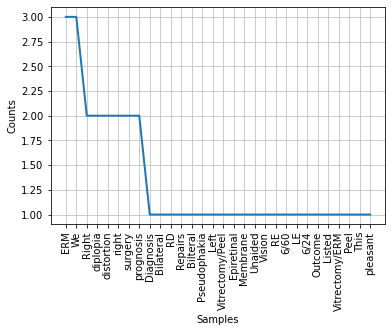

In [14]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [55]:
import regex as re

In [59]:
lettersnew[1]

'This 84 year old man was reviewed in the Cataract Service today following Left Phakoemulsification and IOL, Left Limbal relaxing incision .  He has noted an improvement in vision following surgery.  Visual acuity: Right Eye: 6/24 Unaided, 6/18 Pinhole Left Eye: 6/12 Unaided, 6/9 Pinhole  He has visually significant cataract in the fellow eye and should benefit from surgery.  After a discussion of the benefits and risks of surgery him elected to proceed with surgery and has been listed for: right phakoemulsification and iol under LA.'

In [60]:
re.findall(r'(?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)', lettersnew[2])

['6/24', '6/6']

In [61]:
regex = r"(((R|r|Right|right|RVA)|(RE|Right eye|Right Eye|right eye))(?=\:?\s{0,3}\d/\d))|(((L|l|Left|left|LVA)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d))|(((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|HM|CF|LP|NLP))|((ph|Ph|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d))"
x = re.findall(regex, lettersnew[1])

In [62]:
val = []
for ele in x: 
    val.append([word for word in ele if word != ''][0])
val

['Right Eye', '6/24', '6/18', 'Left Eye', '6/12', '6/9']

In [63]:
lat = []
va = []
for vas in val:
    if vas[0].isalpha():
        lat.append(vas)
    else:
        va.append(vas)

In [64]:
size = len(va)//2
print('-------- RELATIONS --------')
print(lat[0], va[:size])
print(lat[1], va[size:])

-------- RELATIONS --------
Right Eye ['6/24', '6/18']
Left Eye ['6/12', '6/9']


In [13]:
VA_total = []
for letter in letters:
    VA = (re.findall(r'(?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)', letter))
    for value in VA:
        if value not in VA_total:
            VA_total.append(value)
# "(R|r|Right|right)(?=\:\s{0,2}\d | (?=\D))"

In [60]:
regex = r'((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|HM|CF|LP|NLP)'
test_str = " ".join(letters).replace('\r','').replace('\n',' ')

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

Match 1 was found at 135-139: 6/60
Match 2 was found at 143-147: 6/24
Match 3 was found at 1223-1226: 6/6
Match 4 was found at 1233-1236: 6/6
Match 5 was found at 3704-3708: 6/60
Match 6 was found at 3712-3716: 6/12
Match 7 was found at 5157-5161: 6/18
Match 8 was found at 5165-5168: 6/9
Match 9 was found at 5179-5182: 6/5
Match 10 was found at 6411-6415: 6/24
Match 11 was found at 6431-6434: 6/5
Match 12 was found at 7835-7839: 6/12
Match 13 was found at 7861-7864: 6/9
Match 14 was found at 8195-8198: 6/5
Match 15 was found at 8203-8207: 3/60
Match 16 was found at 8208-8212: 6/12
Match 17 was found at 8678-8681: 6/6
Match 18 was found at 9496-9500: 6/18
Match 19 was found at 9510-9514: 6/12
Match 20 was found at 9533-9536: 6/9
Match 21 was found at 9990-9994: 6/12
Match 22 was found at 10005-10008: 6/9
Match 23 was found at 10665-10669: 6/24
Match 24 was found at 10671-10674: 6/6
Match 25 was found at 11086-11090: 3/60
Match 26 was found at 11109-11113: 6/24
Match 27 was found at 1173

Match 1415 was found at 508158-508162: 6/36
Match 1416 was found at 508181-508183: CF
Match 1417 was found at 509509-509513: 6/12
Match 1418 was found at 509532-509536: 6/18
Match 1419 was found at 511366-511369: 6/6
Match 1420 was found at 511380-511383: 6/9
Match 1421 was found at 512370-512373: 6/9
Match 1422 was found at 512394-512397: 6/9
Match 1423 was found at 513383-513387: 6/12
Match 1424 was found at 513398-513402: 6/12
Match 1425 was found at 513828-513831: 6/9
Match 1426 was found at 513841-513844: 6/9
Match 1427 was found at 513863-513866: 6/9
Match 1428 was found at 513876-513879: 6/9
Match 1429 was found at 514487-514490: 6/9
Match 1430 was found at 514502-514505: 6/9
Match 1431 was found at 514912-514915: 6/6
Match 1432 was found at 514926-514929: 6/9
Match 1433 was found at 515884-515888: 6/12
Match 1434 was found at 515899-515903: 6/18
Match 1435 was found at 516131-516135: 6/24
Match 1436 was found at 516255-516258: 6/6
Match 1437 was found at 516543-516546: 6/9
Matc

In [59]:
regex = r"(((R|r|Right|right|RVA)|(RE|Right eye|Right Eye|right eye))(?=\:?\s{0,3}\d/\d))|(((L|l|Left|left|LVA)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d))|(((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|HM|CF|LP|NLP))|((ph|Ph|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d))"
test_str = " ".join(letters).replace('\r','').replace('\n',' ')

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))

Match 1 was found at 132-134: RE
Match 2 was found at 135-139: 6/60
Match 3 was found at 140-142: LE
Match 4 was found at 143-147: 6/24
Match 5 was found at 1220-1222: RE
Match 6 was found at 1223-1226: 6/6
Match 7 was found at 1230-1232: LE
Match 8 was found at 1233-1236: 6/6
Match 9 was found at 3701-3703: RE
Match 10 was found at 3704-3708: 6/60
Match 11 was found at 3709-3711: LE
Match 12 was found at 3712-3716: 6/12
Match 13 was found at 5149-5154: Right
Match 14 was found at 5157-5161: 6/18
Match 15 was found at 5162-5164: ph
Match 16 was found at 5165-5168: 6/9
Match 17 was found at 5171-5175: Left
Match 18 was found at 5179-5182: 6/5
Match 19 was found at 6405-6409: left
Match 20 was found at 6411-6415: 6/24
Match 21 was found at 6424-6429: right
Match 22 was found at 6431-6434: 6/5
Match 23 was found at 7835-7839: 6/12
Match 24 was found at 7861-7864: 6/9
Match 25 was found at 8191-8194: RVA
Match 26 was found at 8195-8198: 6/5
Match 27 was found at 8199-8202: LVA
Match 28 was

Match 367 was found at 105991-105995: 6/60
Match 368 was found at 106000-106004: 6/36
Match 369 was found at 106308-106312: 6/12
Match 370 was found at 106317-106321: 6/18
Match 371 was found at 107345-107349: 6/24
Match 372 was found at 107354-107357: 6/9
Match 373 was found at 107362-107366: 6/12
Match 374 was found at 107371-107374: 6/6
Match 375 was found at 108237-108246: Right eye
Match 376 was found at 108248-108252: 6/18
Match 377 was found at 108253-108261: Left eye
Match 378 was found at 108263-108267: 6/12
Match 379 was found at 108728-108730: HM
Match 380 was found at 109204-109207: 6/9
Match 381 was found at 109210-109212: Ph
Match 382 was found at 109213-109216: 6/6
Match 383 was found at 109219-109223: Left
Match 384 was found at 109225-109229: 6/24
Match 385 was found at 109232-109234: ph
Match 386 was found at 109236-109239: 6/9
Match 387 was found at 109889-109893: 6/18
Match 388 was found at 109894-109897: 6/9
Match 389 was found at 109902-109907: right
Match 390 was

Match 915 was found at 250432-250435: 6/9
Match 916 was found at 250446-250450: 6/12
Match 917 was found at 252635-252638: RVA
Match 918 was found at 252639-252642: 6/9
Match 919 was found at 252644-252647: LVA
Match 920 was found at 252648-252651: 6/9
Match 921 was found at 253003-253006: RVA
Match 922 was found at 253007-253010: 6/9
Match 923 was found at 253012-253015: LVA
Match 924 was found at 253016-253019: 6/5
Match 925 was found at 253116-253120: 1/52
Match 926 was found at 253149-253151: LE
Match 927 was found at 253152-253156: 1/52
Match 928 was found at 253485-253488: RVA
Match 929 was found at 253490-253493: 6/4
Match 930 was found at 253498-253501: LVA
Match 931 was found at 253503-253507: 1/60
Match 932 was found at 253524-253528: 6/60
Match 933 was found at 254195-254198: RVA
Match 934 was found at 254199-254202: 6/9
Match 935 was found at 254204-254207: LVA
Match 936 was found at 254208-254212: 6/12
Match 937 was found at 255238-255243: Right
Match 938 was found at 2552

Match 1986 was found at 499724-499727: 6/6
Match 1987 was found at 500783-500786: 6/9
Match 1988 was found at 500799-500802: 6/9
Match 1989 was found at 501481-501485: 2/60
Match 1990 was found at 501856-501860: 3/60
Match 1991 was found at 501861-501863: ph
Match 1992 was found at 501864-501868: 6/18
Match 1993 was found at 501878-501881: 6/6
Match 1994 was found at 502600-502609: Right Eye
Match 1995 was found at 502611-502614: 6/9
Match 1996 was found at 502623-502631: Left Eye
Match 1997 was found at 502633-502637: 6/12
Match 1998 was found at 502647-502650: 6/9
Match 1999 was found at 503119-503122: 6/9
Match 2000 was found at 503133-503136: 6/9
Match 2001 was found at 503801-503806: Right
Match 2002 was found at 503807-503810: 6/9
Match 2003 was found at 503811-503815: Left
Match 2004 was found at 503816-503820: 3/60
Match 2005 was found at 504168-504172: 6/18
Match 2006 was found at 504183-504187: 6/12
Match 2007 was found at 504530-504533: 6/4
Match 2008 was found at 504544-504

In [40]:
Right = r'((R|r|Right|right)|(RE|Right eye|Right Eye|right eye))(?=\:?\s{0,2}\d/\d)'
left = r'((L|l|Left|left)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d)'
pinhole = r'(ph|Ph|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d)'
Corr = r"((?<=\d\s)|(?<!/d)(aided|corrected|uncorrected|unaided))((?=\svision)|(?=\svisual)|(?=\sVA)|(?=\sright)|(?=\:?\s{0,2}\d/\d))"
"(((R|r|Right|right|RVA)|(RE|Right eye|Right Eye|right eye))(?=\:?\s{0,3}\d/\d))|(((L|l|Left|left|LVA)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d))|(((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|\sHM|\sCF|\sLP|\sNLP))|((ph|Ph|PH|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d))|(((?<=\d\s)|(?<!/d)(aided|corrected|uncorrected|unaided))((?=\svision)|(?=\svisual)|(?=\sVA)|(?=\sright)|(?=\:?\s{0,2}\d/\d)))"
Main = r'(((R|r|Right|right|RVA)|(RE|Right eye|Right Eye|right eye))(?=\:?\s{0,3}\d/\d))|(((L|l|Left|left|LVA)|(LE|Left eye|left eye|Left Eye))(?=\:?\s*\d/\d))|(((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|\sHM|\sCF|\sLP|\sNLP))|((ph|Ph|PH|Pinhole|pinhole)(?=\:?\s{0,2}\d/\d))'

'Diagnosis: Bilateral RD Repairs Bilteral Pseudophakia Left Vitrectomy/Peel for Epiretinal Membrane (ERM) Right ERM  Unaided Vision: RE 6/60 LE 6/24  Outcome: Listed for Right Vitrectomy/ERM Peel  This pleasant lady attended clinic today reporting being troubled by significant diplopia and distortion in her right eye in particular. Examination and OCT scanning confirmed a right epiretinal membrane. We discussed the risks and benefits of surgery and ahe is keen to proceed. The ERM peel may well improve the distortion and some of the diplopia but we have warned her that their is a gaurded prognosis for her acuity. We have listed for surgery as a day case under local anaesthesia on the 9th October 2012. We shall of course keep you informed of her prognosis. This 79 year old man attended the clinic for a routine post op follow up visit. Operated eye is settling down well.  His principal diagnosis is right cataract and left pseudophakia.  He has been listed for right phakoemulsification and

In [8]:
VA_all = []
for letter in letters:
    VA = (re.findall(r'((?<!\d)(?<!\d/)[0-9]/[0-9]{1,2}(?!/?\d)|HM|CF|LP|NLP)', letter))
    for value in VA:
        VA_all.append(value)
VA_all

['6/60',
 '6/24',
 '6/6',
 '6/6',
 '6/60',
 '6/12',
 '6/18',
 '6/9',
 '6/5',
 '6/24',
 '6/5',
 '6/12',
 '6/9',
 '6/5',
 '3/60',
 '6/12',
 '6/6',
 '6/18',
 '6/12',
 '6/9',
 '6/12',
 '6/9',
 '6/24',
 '6/6',
 '3/60',
 '6/24',
 '6/36',
 '6/12',
 '6/18',
 '6/96',
 '6/9',
 '6/36',
 '6/18',
 '6/36',
 '6/6',
 '6/6',
 '6/12',
 '6/9',
 '6/36',
 '6/13',
 '6/60',
 '0/7',
 '6/5',
 '6/12',
 '6/6',
 '6/24',
 '6/18',
 '6/6',
 '6/5',
 '6/24',
 '6/24',
 '6/24',
 '6/24',
 '6/24',
 '6/6',
 '6/6',
 '6/9',
 '6/12',
 '6/9',
 '6/12',
 '6/12',
 'HM',
 '6/60',
 '6/18',
 '6/12',
 '6/12',
 '6/12',
 '6/6',
 '6/4',
 '6/36',
 '6/12',
 '6/9',
 '6/36',
 '6/24',
 '1/60',
 '6/60',
 '6/6',
 '6/9',
 '6/12',
 '6/36',
 '6/12',
 '6/9',
 '6/18',
 '6/9',
 '6/9',
 '6/9',
 '6/6',
 '6/9',
 '6/12',
 '6/9',
 '6/6',
 '6/12',
 '6/18',
 '6/9',
 '6/36',
 '6/18',
 '6/12',
 '6/12',
 '6/12',
 '6/18',
 '6/6',
 '6/12',
 '6/9',
 '6/6',
 '6/5',
 '6/6',
 '6/5',
 '6/9',
 '6/9',
 '6/12',
 '6/24',
 '6/9',
 '6/9',
 '6/9',
 '6/6',
 '6/36',
 '6/18',

In [9]:
from collections import Counter
VA = Counter(VA_all)

In [10]:
VAnew = {x: count for x, count in VA.items() if count >= 8}

<BarContainer object of 14 artists>

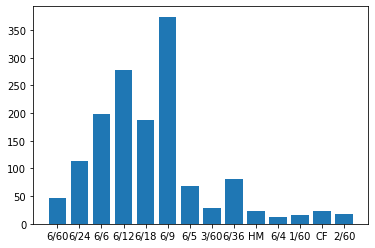

In [11]:
import matplotlib.pyplot as plt
plt.bar(VAnew.keys(), VAnew.values())

In [13]:
VA.most_common(10)

[('6/9', 374),
 ('6/12', 278),
 ('6/6', 199),
 ('6/18', 187),
 ('6/24', 113),
 ('6/36', 81),
 ('6/5', 68),
 ('6/60', 46),
 ('3/60', 28),
 ('HM', 24)]

# BIO Tagging

In [80]:
csv2 = []
right = ['right', 'Right', 'RIGHT', 'RE', 'R', 'r','re']
left = ['left', 'Left', 'LEFT', 'LE', 'L', 'l', 'le']
def tag(letter, num):
    x = 'Sentence ' + str(num)
    for word in letter:
        if word in VA_all:
            csv2.append([x, word, 'VA'])
        elif word in right:
            csv2.append([x, word, 'B-LTR'])
        elif word in left:
            csv2.append([x, word, 'B-LTR'])
        else:
            csv2.append([x, word,'O'])
            

In [62]:
text= letters[0]
word_tokenize(letter)

['Diagnosis',
 ':',
 'Right',
 'eye',
 ':',
 '(',
 'R3S',
 'and',
 'evidence',
 'of',
 'photocoagulation/M0',
 'and',
 'evidence',
 'of',
 'photocoagulation',
 ')',
 'Left',
 'eye',
 ':',
 '(',
 'R3S',
 'and',
 'evidence',
 'of',
 'photocoagulation/M1S',
 'and',
 'evidence',
 'of',
 'photocoagulation',
 ')',
 'Visual',
 'acuity',
 ':',
 'HM',
 'on',
 'the',
 'right',
 'and',
 '6/60',
 'on',
 'the',
 'left',
 'Laser',
 'management',
 ':',
 'Not',
 'Required',
 'Comments',
 ':',
 'She',
 'has',
 'been',
 'advised',
 'of',
 'the',
 'importance',
 'of',
 'optimal',
 'blood',
 'sugar',
 'and',
 'blood',
 'pressure',
 'control',
 'in',
 'reducing',
 'the',
 'risk',
 'of',
 'retinopathy',
 'and',
 'maculopathy',
 'worsening',
 '.',
 'The',
 'importance',
 'of',
 'regular',
 'follow-up',
 'has',
 'been',
 'emphasised',
 '.',
 'Other',
 'points',
 ':',
 'We',
 'will',
 'manage',
 'her',
 'conservatively',
 'given',
 'the',
 'level',
 'of',
 'macular',
 'ischemia',
 'in',
 'the',
 'left',
 'eye'

In [81]:
text= letters[0]
csv = []
count = 1
for letter in letters[0:50]:
    tag(word_tokenize(letter), count)
    count +=1
#     print(word_tokenize(letter))
#     for word in word_tokenize(letter):
#         csv.append(word)

In [82]:
import pandas as pd
df = pd.DataFrame(csv2)

In [58]:
df.to_csv('tag.csv', index = False, header = False)

In [83]:
df.iloc[20:40]

,0,1,2
20,Sentence 1,RE,B-LTR
21,Sentence 1,6/60,VA
22,Sentence 1,LE,B-LTR
23,Sentence 1,6/24,VA
24,Sentence 1,Outcome,O
25,Sentence 1,:,O
26,Sentence 1,Listed,O
27,Sentence 1,for,O
28,Sentence 1,Right,B-LTR
29,Sentence 1,Vitrectomy/ERM,O


In [88]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s[1].values.tolist(),
                                                           s[2].values.tolist())]
        self.grouped = self.data.groupby(0).apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [89]:
getter = SentenceGetter(df)

In [90]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
sentences[0]

['Diagnosis',
 ':',
 'Bilateral',
 'RD',
 'Repairs',
 'Bilteral',
 'Pseudophakia',
 'Left',
 'Vitrectomy/Peel',
 'for',
 'Epiretinal',
 'Membrane',
 '(',
 'ERM',
 ')',
 'Right',
 'ERM',
 'Unaided',
 'Vision',
 ':',
 'RE',
 '6/60',
 'LE',
 '6/24',
 'Outcome',
 ':',
 'Listed',
 'for',
 'Right',
 'Vitrectomy/ERM',
 'Peel',
 'This',
 'pleasant',
 'lady',
 'attended',
 'clinic',
 'today',
 'reporting',
 'being',
 'troubled',
 'by',
 'significant',
 'diplopia',
 'and',
 'distortion',
 'in',
 'her',
 'right',
 'eye',
 'in',
 'particular',
 '.',
 'Examination',
 'and',
 'OCT',
 'scanning',
 'confirmed',
 'a',
 'right',
 'epiretinal',
 'membrane',
 '.',
 'We',
 'discussed',
 'the',
 'risks',
 'and',
 'benefits',
 'of',
 'surgery',
 'and',
 'ahe',
 'is',
 'keen',
 'to',
 'proceed',
 '.',
 'The',
 'ERM',
 'peel',
 'may',
 'well',
 'improve',
 'the',
 'distortion',
 'and',
 'some',
 'of',
 'the',
 'diplopia',
 'but',
 'we',
 'have',
 'warned',
 'her',
 'that',
 'their',
 'is',
 'a',
 'gaurded',
 '

In [92]:
labels = [[s[1] for s in sentence] for sentence in getter.sentences]
print(labels[0])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LTR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LTR', 'O', 'O', 'O', 'O', 'B-LTR', 'VA', 'B-LTR', 'VA', 'O', 'O', 'O', 'O', 'B-LTR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LTR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LTR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [93]:
tag_values = list(set(df[2].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

In [94]:
tag2idx

{'B-LTR': 0, 'VA': 1, 'O': 2, 'PAD': 3}

In [68]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__


Using TensorFlow backend.
C:\Users\Prashant Verma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Prashant Verma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Prashant Verma\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Prashant Verma\anaconda3\lib\site-packages\t

'1.7.0'

In [69]:
MAX_LEN = 75
bs = 32

In [70]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'GeForce 940MX'

In [95]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

In [96]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels


In [97]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]

In [98]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [99]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [100]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [101]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [102]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [122]:
tr_inputs = torch.tensor(tr_inputs).to(torch.int64)
val_inputs = torch.tensor(val_inputs).to(torch.int64)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

C:\Users\Prashant Verma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
C:\Users\Prashant Verma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\Prashant Verma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prashant Verma\anaconda3\lib\site-pac

In [123]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [105]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'4.8.0.dev0'

In [106]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [107]:
model.cuda();

In [108]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [109]:
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [116]:
from seqeval.metrics import f1_score, accuracy_score

ModuleNotFoundError: No module named 'seqeval'

In [120]:
from tqdm import tqdm, trange

In [124]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()


Epoch:   0%|                                                                                     | 0/3 [00:05<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.14 GiB already allocated; 630.40 KiB free; 1.32 GiB reserved in total by PyTorch)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()
